In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from scipy.stats import entropy
from collections import Counter
from activ import load_data
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from collections import Counter
from activ.readfile import load_preprocessed, TrackTBIFile, encode

In [87]:
subdata = load_data()
nmfdata = load_data(uoinmf=True)
sub_oc_features = subdata.outcome_features
sub_bm_features = subdata.biomarker_features
oc_bases = nmfdata.outcome_bases
sub_oc = subdata.outcomes
sub_bm = subdata.biomarkers
sub_id = subdata.patient_ids

In [95]:
dead_data = load_data(dead=True)
dead_oc_features = dead_data.outcome_features
dead_bm_features = dead_data.biomarker_features
dead_oc = dead_data.outcomes
dead_bm = dead_data.biomarkers
dead_id = dead_data.patient_ids

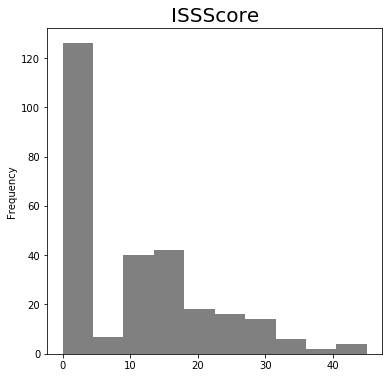

In [146]:
plt.figure(figsize=(6,6))
gcs = dead_bm[:,161]
plt.hist(gcs, color='gray')
plt.ylabel('Frequency', fontsize=10)
plt.title('ISSScore', fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ_misc/ISSScore.pdf')
plt.show()

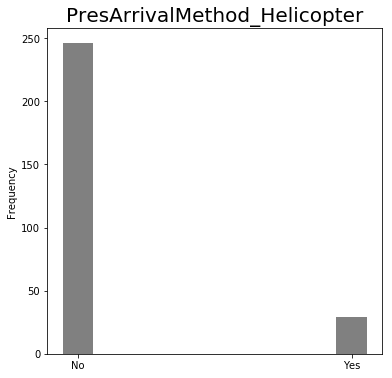

In [149]:
plt.figure(figsize=(6,6))
gcs = dead_bm[:,102]
plt.hist(gcs, color='gray')
plt.ylabel('Frequency', fontsize=10)
plt.title('PresArrivalMethod_Helicopter', fontsize=20)
plt.xticks([0.05, 0.95],['No', 'Yes'])
plt.savefig('/Users/ahyeon/Desktop/activ_misc/arrival_helicopter.pdf')
plt.show()

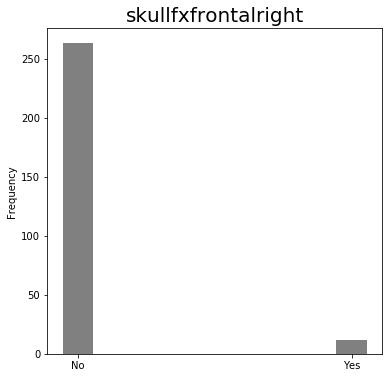

In [145]:
plt.figure(figsize=(6,6))
gcs = dead_bm[:,165]
plt.hist(gcs, color='gray')
plt.ylabel('Frequency', fontsize=10)
plt.title('skullfxfrontalright', fontsize=20)
plt.xticks([0.05, 0.95],['No', 'Yes'])
plt.savefig('/Users/ahyeon/Desktop/activ_misc/skullfxfrontalright.pdf')
plt.show()

## GCS 

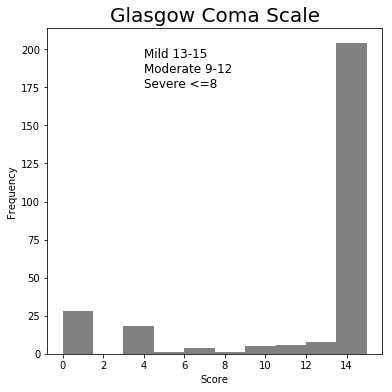

In [123]:
plt.figure(figsize=(6,6))
gcs = dead_bm[:,113]
plt.hist(gcs, color='gray')
plt.text(4,175, 'Mild 13-15\nModerate 9-12\nSevere <=8', fontsize=12)
plt.xlabel('Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Glasgow Coma Scale', fontsize=20)
plt.savefig('/Users/ahyeon/Desktop/activ_misc/gcs_hist.pdf')
plt.show()

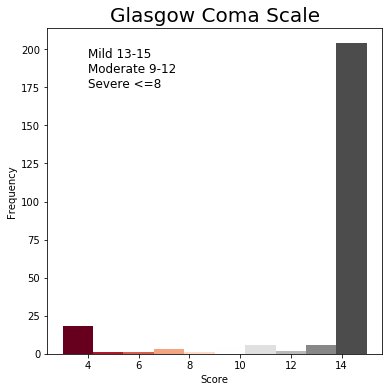

In [7]:
plt.figure(figsize=(6,6))

cm = plt.cm.get_cmap('RdGy')
n, bins, patches = plt.hist(gcs)
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/10)) # notice the i/25
plt.text(4,175, 'Mild 13-15\nModerate 9-12\nSevere <=8', fontsize=12)
plt.xlabel('Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Glasgow Coma Scale', fontsize=20)
# plt.savefig('/Users/ahyeon/Desktop/activ misc/gcs_hist.pdf')
plt.show()

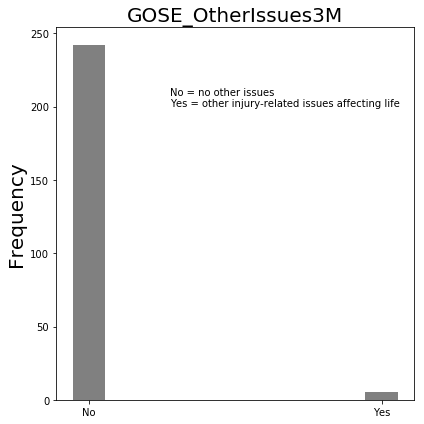

In [7]:
plt.figure(figsize=(6,6))
plt.title('GOSE_OtherIssues3M', fontsize=20)
plt.hist(sub_bm[:,3]-1, color='grey')
plt.xticks([0.05, 0.95],['No', 'Yes'])
plt.ylabel('Frequency', fontsize=20)
plt.text(0.3,200,'No = no other issues\nYes = other injury-related issues affecting life')
plt.tight_layout()
plt.savefig('/Users/ahyeon/Desktop/activ misc/gose_otherissues_3m_hist.pdf')
plt.show()

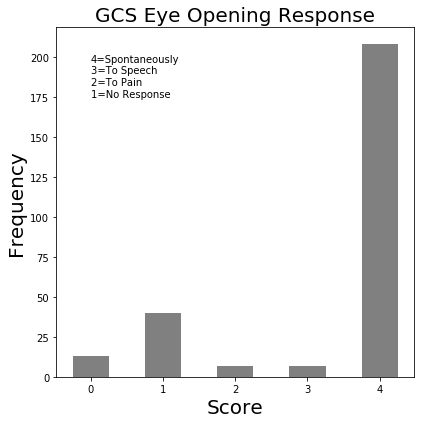

In [125]:
plt.figure(figsize=(6,6))
plt.title('GCS Eye Opening Response', fontsize=20)
plt.hist(dead_bm[:,106], align='left',bins = np.arange(0,5,0.5), color='grey')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Score', fontsize=20)
plt.xticks(np.arange(5), [0,1,2,3,4])
plt.text(0,175, '4=Spontaneously\n3=To Speech\n2=To Pain\n1=No Response')
plt.tight_layout()
plt.savefig('/Users/ahyeon/Desktop/activ_misc/admgcseyes_hist.pdf')
plt.show()

## GOSE

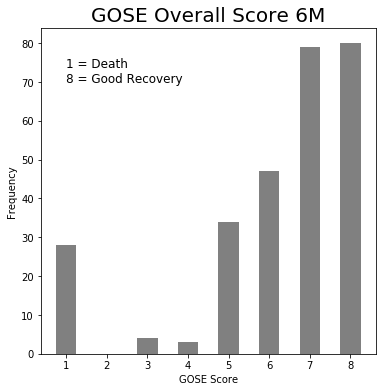

In [126]:
gose_overallscore_6m = dead_oc[:,32]
plt.subplots(figsize = (6,6))
plt.hist(gose_overallscore_6m, align='left', bins=np.arange(1,9,0.5), color='gray')
plt.title('GOSE Overall Score 6M', fontsize=20)
plt.xlabel('GOSE Score')
plt.ylabel('Frequency')
plt.text(1,70, '1 = Death\n8 = Good Recovery',fontsize=12)
plt.savefig('/Users/ahyeon/Desktop/activ_misc/gose6m_hist.pdf')
plt.show()

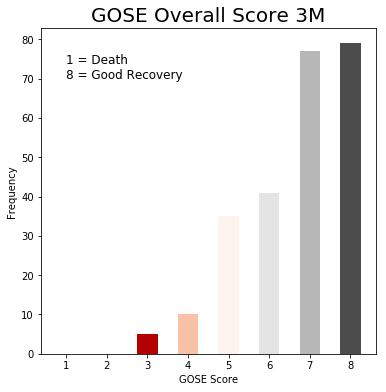

In [11]:
plt.subplots(figsize = (6,6))
cm = plt.cm.get_cmap('RdGy')
idx = np.arange(0,1,1/17)
red = (0.7, 0.0, 0.0, 1.0)
grey = (0.0, 0.0, 0.0, 0.7)
colors = [cm(j) for j in idx]
colors[14]=grey
colors[4]=red

gose_overallscore_3m = sub_oc[:,4]

n, bins, patches = plt.hist(gose_overallscore_3m, align='left', bins=np.arange(1,9,0.5))
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', colors[i]) 
    
plt.title('GOSE Overall Score 3M', fontsize=20)
plt.xlabel('GOSE Score')
plt.ylabel('Frequency')
plt.text(1,70, '1 = Death\n8 = Good Recovery',fontsize=12)
# plt.savefig('/Users/ahyeon/Desktop/activ misc/gose3m_hist.pdf')
plt.show()

In [150]:
dead_oc_features

array(['GOSE_NeedAssistance3M', 'GOSE_WorkResume3M',
       'GOSE_DisruptRelation3M', 'GOSE_OtherIssues3M',
       'GOSE_OverallScore3M', 'NeuroPhysHeadache3mo',
       'NeuroPhysBalanceProbl3mo', 'NeuroPhysDizziness3mo',
       'NeuroPhysVisualProbl3mo', 'NeuroPhysFatigue3mo',
       'NeuroPhysLightSensitivity3mo', 'NeuroPhysNoiseSensitivity3mo',
       'NeuroPhysNumbnessTingling3mo', 'NeuroSleepDrowsiness3mo',
       'NeuroSleepSleepingLess3mo', 'NeuroSleepSleepingMore3mo',
       'NeuroSleepTroubleFallingAsleep3mo', 'NeuroCognitiveFoggy3mo',
       'NeuroCognitiveSlowedDown3mo',
       'NeuroCognitiveDiffConcentrating3mo',
       'NeuroCognitiveDiffRemembering3mo',
       'NeuroEmotionalMoreEmotional3mo', 'NeuroEmotionalNervousness3mo',
       'NeuroOverallRating3mo', 'GOSE_Reponder6M_Patient.alone',
       'GOSE_Reponder6M_Patient.plus.relative', 'GOSE_NeedAssistance6M',
       'GOSE_Travel6M', 'GOSE_SocialResume6M', 'GOSE_OtherIssues6M',
       'GOSE_Epilepsy6M', 'GOSE_EpilepsyRis

In [168]:
for ii,f in enumerate(dead_oc_features):
    if 'BSI18AnxT_6mo' in f:
        print(ii,f)

59 BSI18AnxT_6mo


In [169]:
Counter(dead_oc[:,59])

Counter({5.0: 28,
         38.0: 12,
         39.0: 41,
         45.0: 9,
         47.0: 24,
         48.0: 30,
         50.0: 9,
         52.0: 6,
         54.0: 4,
         57.0: 25,
         59.0: 4,
         60.0: 8,
         61.0: 12,
         62.0: 4,
         63.0: 3,
         65.0: 8,
         66.0: 6,
         67.0: 2,
         68.0: 13,
         69.0: 5,
         70.0: 6,
         71.0: 4,
         73.0: 2,
         74.0: 2,
         76.0: 2,
         79.0: 2,
         81.0: 4})

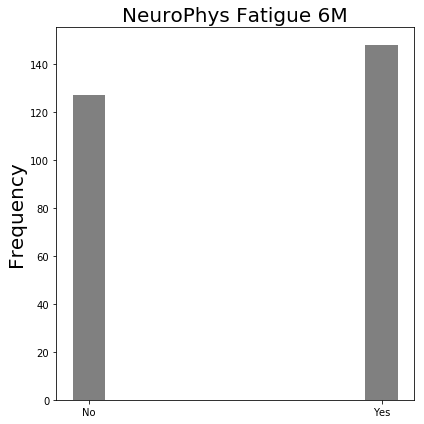

In [154]:
plt.figure(figsize=(6,6))
plt.title('NeuroPhys Fatigue 6M', fontsize=20)
plt.hist(dead_oc[:,39], color='grey')
plt.xticks([0.05, 0.95],['No', 'Yes'])
plt.ylabel('Frequency', fontsize=20)
plt.tight_layout()
plt.savefig('/Users/ahyeon/Desktop/activ_misc/neurophys_fatigue.pdf')
plt.show()

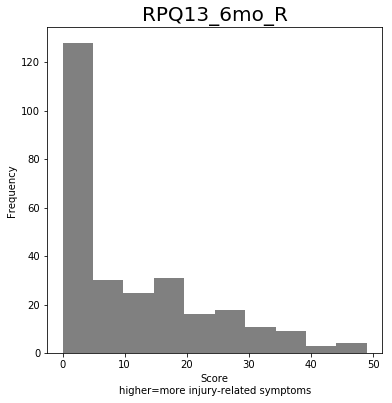

In [163]:
plt.subplots(figsize = (6,6))
plt.hist(dead_oc[:,94], color='gray')
plt.title('RPQ13_6mo_R', fontsize=20)
plt.xlabel('Score\nhigher=more injury-related symptoms')
plt.ylabel('Frequency')
plt.savefig('/Users/ahyeon/Desktop/activ_misc/rpq13.pdf')
plt.show()

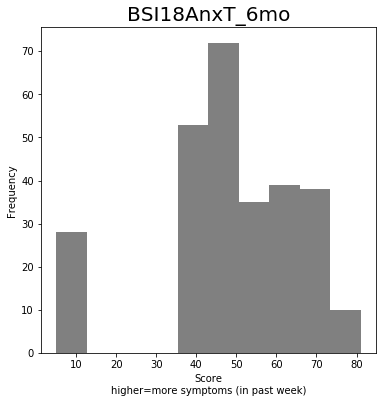

In [172]:
plt.subplots(figsize = (6,6))
plt.hist(dead_oc[:,59], color='gray')
plt.title('BSI18AnxT_6mo', fontsize=20)
plt.xlabel('Score\nhigher=more symptoms (in past week)')
plt.ylabel('Frequency')
plt.savefig('/Users/ahyeon/Desktop/activ_misc/bsi18anxt.pdf')
plt.show()